In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import numpy as np
import matplotlib.ticker as mtick

# Define file paths
files = [
    "db_download_create.csv",
    "db_download_decide.csv",
    "db_download_learn.csv",
    "db_download_remember.csv",
    "db_download_sense.csv"
]

# Read and concatenate all CSV files into a single dataframe
dataframes = [pd.read_csv(file) for file in files]
database = pd.concat(dataframes).drop_duplicates()

In [2]:
database = database.reset_index(drop=True)

In [3]:
len(database)

994

In [4]:
database.columns

Index(['Who / What', 'Use case', 'Description', 'Sense', 'Remember', 'Create',
       'Decide', 'Learn', 'Illuminate network', 'Incentivize', 'Feed',
       'Collaborate', 'Connect', 'Curate', 'Collaborate_', 'Compute',
       'Community', 'Market', 'Ecosystem', 'Democratic "voting"', 'Democracy',
       'Consumer / retail', 'Healthcare', 'Public sector, NGO',
       'Manufacturing hardw., Infra', 'High Tech (software)',
       'Financial services', 'Professional services',
       'Media, telco, entertainment, hospitality', 'Agriculture',
       'Energy, nat. resources', 'Education and academia',
       'Supply chain, real estate', 'Case', 'text_details', 'embeddings'],
      dtype='object')

In [5]:
areas = ['Consumer / retail', 'Healthcare', 'Public sector, NGO',
       'Manufacturing hardw., Infra', 'High Tech (software)',
       'Financial services', 'Professional services',
       'Media, telco, entertainment, hospitality', 'Agriculture',
       'Energy, nat. resources', 'Education and academia',
       'Supply chain, real estate']
len(areas)

12

In [6]:
nums = dict()
for i in areas:
    j = database[i].count()
    nums[i] = j 
nums = dict(sorted(nums.items(), key=lambda item: item[1], reverse = True))
nums

{'Public sector, NGO': 183,
 'High Tech (software)': 162,
 'Media, telco, entertainment, hospitality': 126,
 'Energy, nat. resources': 91,
 'Education and academia': 78,
 'Healthcare': 72,
 'Financial services': 54,
 'Consumer / retail': 52,
 'Manufacturing hardw., Infra': 35,
 'Professional services': 34,
 'Supply chain, real estate': 27,
 'Agriculture': 24}

In [7]:
sum(nums.values())

938

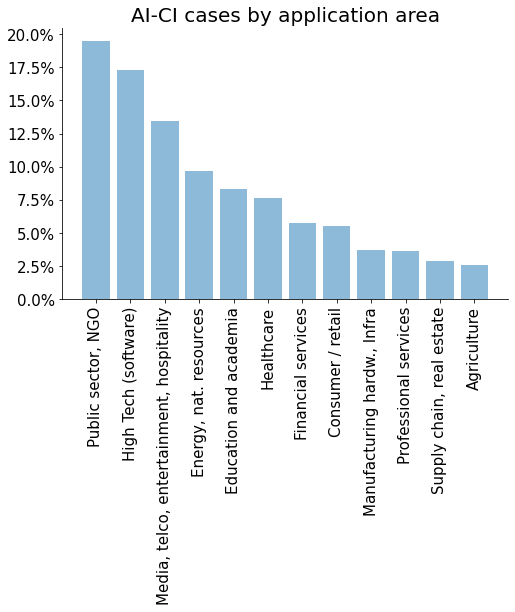

In [8]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.bar(list(nums.keys()), 100*np.array(list(nums.values()))/sum(list(nums.values())), align='center', alpha=0.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.ylabel('Percentage', fontsize = 20)
plt.title('AI-CI cases by application area', fontsize = 20)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.savefig('AI_CI_cases_2024.png', format='png', dpi=300, bbox_inches = 'tight')
